In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
# from sklearn.feature_extraction
# import xgboost xgb

from sklearn.model_selection import train_test_split


# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
sys.path.append(os.path.abspath('..'))
from src.helpers.datapi import datas, url_data_call
from src.model.model import Early_Stopping, ModelCheckPoint, EarthquakeModel
from src.preprocessing.data_preprocessing import *

In [3]:
# !pip install xgboost

In [4]:
df1 = url_data_call(datas['year22'])
df1.columns
# df1 = data_preprocessing(dataframe=df1, ts=True)

Index(['geo', 'mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt',
       'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title'],
      dtype='object')

In [2]:
df = pd.DataFrame()

for key, values in datas.items():
    print(f"{key} with value: {values}")
    pseudo_df = url_data_call(datas[key])

    df = pd.concat([df, pseudo_df])

year22 with value: https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2022-05-01%2000:00:00&endtime=2023-01-01%2000:00:00&minmagnitude=2.5&orderby=time
year23 with value: https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2023-01-01%2000:00:00&endtime=2023-05-01%2000:00:00&minmagnitude=2.5&orderby=time
year24 with value: https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2023-05-01%2000:00:00&endtime=2024-01-01%2000:00:00&minmagnitude=2.5&orderby=time


In [3]:
# df.info()
# df.describe()
# df.shape
# df
df = data_preprocessing(df, ts=True)
# df.isna().sum()

In [4]:
df

,mag,dmin,rms,magType,longitude,latitude,elevation
time,,,,,,,
2022-05-01 00:02:55.593,4.40,20.9710,0.64,mb,27.6375,-52.770900,10.000
2022-05-01 01:22:46.818,4.70,2.5540,0.77,mb,142.3848,29.653000,10.000
2022-05-01 01:33:35.201,4.20,1.3460,1.06,mb,24.1134,39.603900,10.000
2022-05-01 01:52:26.244,4.50,1.6090,0.83,mb,126.4725,26.794400,10.000
2022-05-01 02:10:52.717,4.30,2.4160,0.65,mb,127.9058,3.142900,106.400
...,...,...,...,...,...,...,...
2023-12-31 21:42:27.330,2.56,0.1071,0.17,md,-66.8160,18.064167,14.760
2023-12-31 22:13:49.174,4.20,0.4520,0.53,mb,144.5892,13.952600,193.928
2023-12-31 22:48:19.016,4.40,3.4550,0.54,mb,-178.3327,-17.506500,540.654


In [8]:
df

,mag,dmin,rms,magType,longitude,latitude,elevation
time,,,,,,,
2022-12-31 23:54:48.008,3.60,1.0600,0.51,ml,-166.619200,52.694100,35.000
2022-12-31 23:04:12.381,4.90,1.0960,0.75,mww,-69.659000,-16.501300,190.386
2022-12-31 22:44:54.316,4.10,3.7780,0.46,mb,-179.737700,-17.770500,613.983
2022-12-31 21:14:58.931,3.00,NaN,0.67,ml,-151.154700,62.404900,6.600
2022-12-31 21:00:24.164,2.60,0.6190,0.42,ml,-176.029300,51.290000,10.000
...,...,...,...,...,...,...,...
2023-05-01 00:49:00.850,3.09,0.5998,0.21,md,-66.786167,18.948833,14.100
2023-05-01 00:46:53.270,3.13,0.6209,0.26,md,-66.760833,18.970833,8.300
2023-05-01 00:16:20.641,5.10,0.6850,0.66,mww,-177.433500,-29.802000,28.056


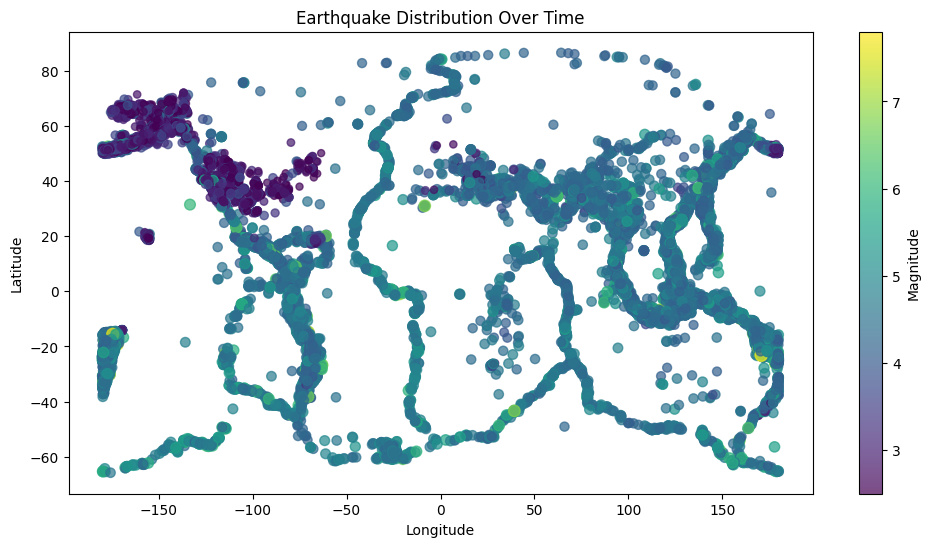

In [9]:
# # Ensure 'time' is in datetime format
# df['time'] = pd.to_datetime(df['time'])  

# # Set 'time' as the index
# df.set_index('time', inplace=True)

# Now plot: 
plt.figure(figsize=(12, 6))
plt.scatter(df['longitude'], df['latitude'], s=df['mag']*10, c=df['mag'], cmap='viridis', alpha=0.7) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Distribution Over Time')
plt.colorbar(label='Magnitude')
plt.show()


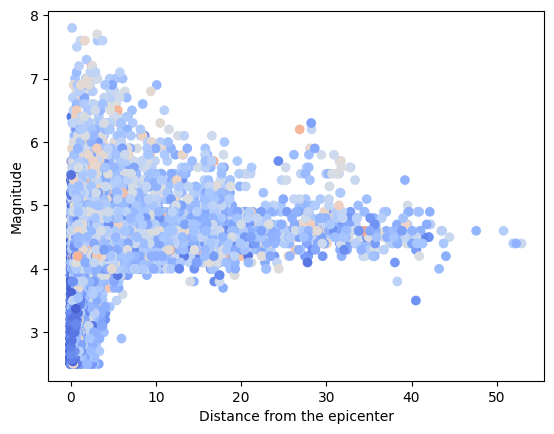

In [10]:
plt.scatter(df['dmin'], df['mag'], c=df['rms'], cmap='coolwarm')
plt.xlabel("Distance from the epicenter")
plt.ylabel("Magnitude")
plt.show()

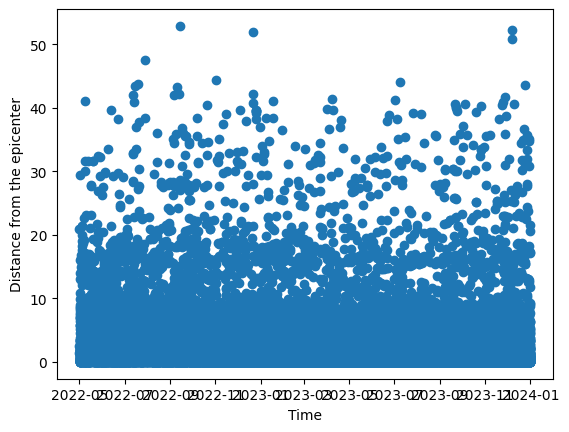

In [11]:
plt.scatter(df.index, df['dmin'])
plt.xlabel("Time")
plt.ylabel("Distance from the epicenter")
plt.show()

In [12]:
df2 = imput_encode(df)
df2

,mag,dmin,rms,magType,longitude,latitude,elevation
time,,,,,,,
2022-12-31 23:54:48.008,3.60,1.0600,0.51,4,-166.619200,52.694100,35.000
2022-12-31 23:04:12.381,4.90,1.0960,0.75,13,-69.659000,-16.501300,190.386
2022-12-31 22:44:54.316,4.10,3.7780,0.46,0,-179.737700,-17.770500,613.983
2022-12-31 21:14:58.931,3.00,NaN,0.67,4,-151.154700,62.404900,6.600
2022-12-31 21:00:24.164,2.60,0.6190,0.42,4,-176.029300,51.290000,10.000
...,...,...,...,...,...,...,...
2023-05-01 00:49:00.850,3.09,0.5998,0.21,2,-66.786167,18.948833,14.100
2023-05-01 00:46:53.270,3.13,0.6209,0.26,2,-66.760833,18.970833,8.300
2023-05-01 00:16:20.641,5.10,0.6850,0.66,13,-177.433500,-29.802000,28.056


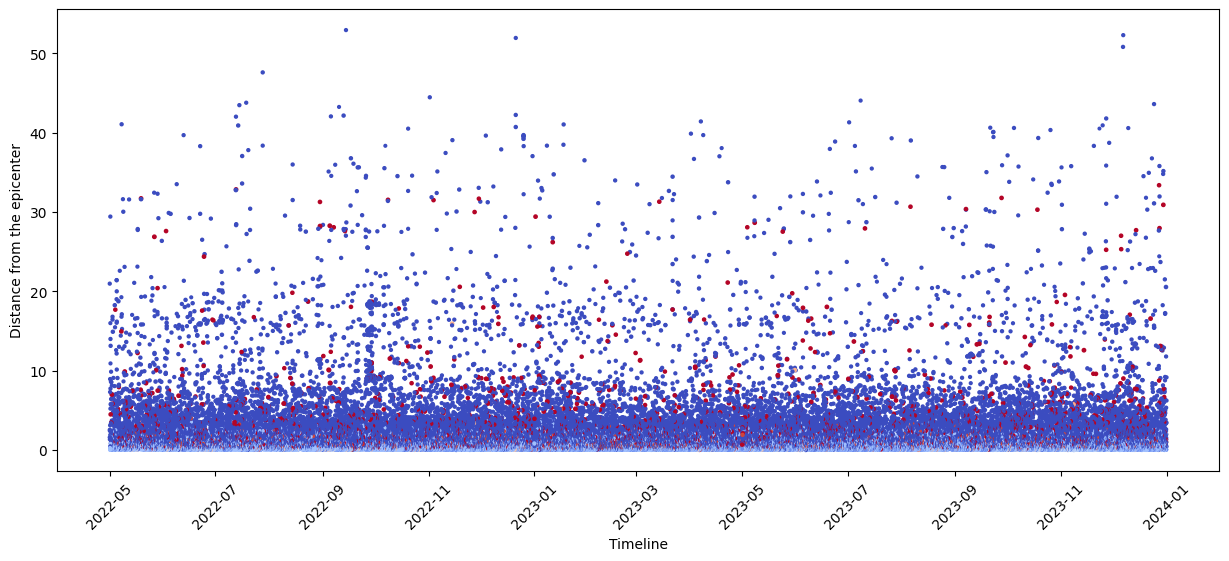

In [13]:
plt.figure(figsize=(15, 6))

plt.scatter(df2.index, df2["dmin"], c=df2["magType"], s=df2["mag"], cmap="coolwarm")
plt.xlabel("Timeline")
plt.ylabel("Distance from the epicenter")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='None', ylabel='dmin'>

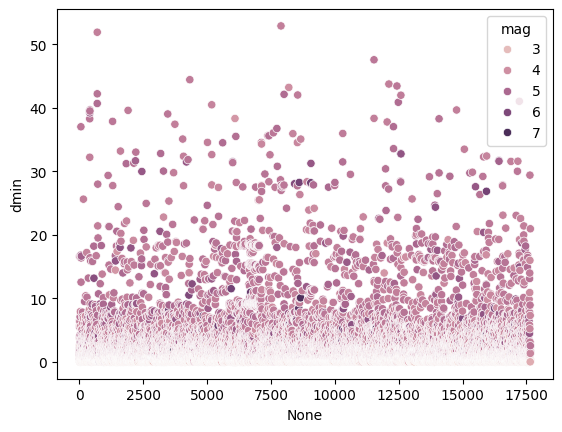

In [14]:
sns.scatterplot(df1, y="dmin", x=df1.index, hue=df1["mag"])

---

# Models

> ## Data Manipulation

In [15]:
df.columns

Index(['mag', 'dmin', 'rms', 'magType', 'longitude', 'latitude', 'elevation'], dtype='object')

In [16]:
df.shape

(44568, 7)

In [17]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 44568 entries, 2022-12-31 23:54:48.008000 to 2023-05-01 00:09:19.473000
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag        44568 non-null  float64
 1   dmin       39988 non-null  float64
 2   rms        44568 non-null  float64
 3   magType    44568 non-null  int32  
 4   longitude  44568 non-null  float64
 5   latitude   44568 non-null  float64
 6   elevation  44568 non-null  float64
dtypes: float64(6), int32(1)
memory usage: 2.6 MB


In [18]:
df.describe()

,mag,dmin,rms,magType,longitude,latitude,elevation
count,44568.000000,39988.000000,44568.000000,44568.000000,44568.000000,44568.000000,44568.000000
mean,3.874214,2.671378,0.549895,2.225947,-24.220694,18.758907,64.775111
std,0.857750,4.178654,0.263832,3.288817,128.757382,30.488210,114.098426
min,2.500000,0.000000,0.000000,0.000000,-179.998700,-65.849700,-3.740000
25%,3.000000,0.491000,0.360000,0.000000,-154.110475,-5.730550,10.000000
50%,4.200000,1.432000,0.560000,0.000000,-66.925916,19.259900,19.000000
75%,4.500000,3.114000,0.720000,4.000000,126.072100,46.530133,63.302750
max,7.800000,52.919000,1.830000,13.000000,179.999400,86.647700,681.238000


In [19]:
# CHekcing for null and empty values

df.isna().sum()

mag             0
dmin         4580
rms             0
magType         0
longitude       0
latitude        0
elevation       0
dtype: int64

In [20]:
df.dmin.isnull().any()

True

In [21]:
df2_ffill = df.copy()
df2_ffill['dmin'] = df2['dmin'].fillna(method='ffill')
df2_ffill

C:\Users\Rishi\AppData\Local\Temp\ipykernel_15388\1242196278.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2_ffill['dmin'] = df2['dmin'].fillna(method='ffill')


,mag,dmin,rms,magType,longitude,latitude,elevation
time,,,,,,,
2022-12-31 23:54:48.008,3.60,1.0600,0.51,4,-166.619200,52.694100,35.000
2022-12-31 23:04:12.381,4.90,1.0960,0.75,13,-69.659000,-16.501300,190.386
2022-12-31 22:44:54.316,4.10,3.7780,0.46,0,-179.737700,-17.770500,613.983
2022-12-31 21:14:58.931,3.00,3.7780,0.67,4,-151.154700,62.404900,6.600
2022-12-31 21:00:24.164,2.60,0.6190,0.42,4,-176.029300,51.290000,10.000
...,...,...,...,...,...,...,...
2023-05-01 00:49:00.850,3.09,0.5998,0.21,2,-66.786167,18.948833,14.100
2023-05-01 00:46:53.270,3.13,0.6209,0.26,2,-66.760833,18.970833,8.300
2023-05-01 00:16:20.641,5.10,0.6850,0.66,13,-177.433500,-29.802000,28.056


In [22]:
df2_ffill.describe()

,mag,dmin,rms,magType,longitude,latitude,elevation
count,44568.000000,44568.000000,44568.000000,44568.000000,44568.000000,44568.000000,44568.000000
mean,3.874214,2.667042,0.549895,2.225947,-24.220694,18.758907,64.775111
std,0.857750,4.167547,0.263832,3.288817,128.757382,30.488210,114.098426
min,2.500000,0.000000,0.000000,0.000000,-179.998700,-65.849700,-3.740000
25%,3.000000,0.492775,0.360000,0.000000,-154.110475,-5.730550,10.000000
50%,4.200000,1.425000,0.560000,0.000000,-66.925916,19.259900,19.000000
75%,4.500000,3.111250,0.720000,4.000000,126.072100,46.530133,63.302750
max,7.800000,52.919000,1.830000,13.000000,179.999400,86.647700,681.238000


In [23]:
df2_ffill.describe()

,mag,dmin,rms,magType,longitude,latitude,elevation
count,44568.000000,44568.000000,44568.000000,44568.000000,44568.000000,44568.000000,44568.000000
mean,3.874214,2.667042,0.549895,2.225947,-24.220694,18.758907,64.775111
std,0.857750,4.167547,0.263832,3.288817,128.757382,30.488210,114.098426
min,2.500000,0.000000,0.000000,0.000000,-179.998700,-65.849700,-3.740000
25%,3.000000,0.492775,0.360000,0.000000,-154.110475,-5.730550,10.000000
50%,4.200000,1.425000,0.560000,0.000000,-66.925916,19.259900,19.000000
75%,4.500000,3.111250,0.720000,4.000000,126.072100,46.530133,63.302750
max,7.800000,52.919000,1.830000,13.000000,179.999400,86.647700,681.238000


In [24]:
print(f"Foward fill mean value: {df2.dmin.mean()}, \nNo fill mean value: {df.dmin.mean()}")

Foward fill mean value: 2.671377996757338, 
No fill mean value: 2.671377996757338


In [25]:
df.dmin.mean() - df2.dmin.mean() 

0.0

In [26]:
df2_bfill = df.copy()
df2_bfill['dmin'] = df2_bfill['dmin'].fillna(method="bfill")
df2_bfill

C:\Users\Rishi\AppData\Local\Temp\ipykernel_15388\247571665.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2_bfill['dmin'] = df2_bfill['dmin'].fillna(method="bfill")


,mag,dmin,rms,magType,longitude,latitude,elevation
time,,,,,,,
2022-12-31 23:54:48.008,3.60,1.0600,0.51,4,-166.619200,52.694100,35.000
2022-12-31 23:04:12.381,4.90,1.0960,0.75,13,-69.659000,-16.501300,190.386
2022-12-31 22:44:54.316,4.10,3.7780,0.46,0,-179.737700,-17.770500,613.983
2022-12-31 21:14:58.931,3.00,0.6190,0.67,4,-151.154700,62.404900,6.600
2022-12-31 21:00:24.164,2.60,0.6190,0.42,4,-176.029300,51.290000,10.000
...,...,...,...,...,...,...,...
2023-05-01 00:49:00.850,3.09,0.5998,0.21,2,-66.786167,18.948833,14.100
2023-05-01 00:46:53.270,3.13,0.6209,0.26,2,-66.760833,18.970833,8.300
2023-05-01 00:16:20.641,5.10,0.6850,0.66,13,-177.433500,-29.802000,28.056


In [27]:
df.dmin.mean() - df2_bfill.dmin.mean() 

-0.009086382737593102

In [28]:
df2_ffill = CyclicTimeTransform(df2_ffill)
df2_bfill = CyclicTimeTransform(df2_bfill)

In [29]:
X1, Y1, target_columns = var_and_tar(df2_ffill)
X2, Y2, target_columns = var_and_tar(df2_bfill)

In [30]:
scaled_X, scaler_X = scaler_dataset(X1)
scaled_Y, scaler_Y = scaler_dataset(Y1)

In [31]:
scaled_X.head(25)

,mag,dmin,rms,magType,longitude,latitude,elevation,Hour sin,Hour cos,Day sin,Day cos,Month sin,Month cos,day_of_year,month
time,,,,,,,,,,,,,,,
2022-12-31 23:54:48.008,0.207547,0.020031,0.278689,0.307692,0.037165,0.777350,0.056557,0.370590,0.982963,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 23:04:12.381,0.452830,0.020711,0.409836,1.000000,0.306501,0.323602,0.283405,0.370590,0.982963,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 22:44:54.316,0.301887,0.071392,0.251366,0.000000,0.000725,0.315279,0.901814,0.250000,0.933013,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 21:14:58.931,0.094340,0.071392,0.366120,0.307692,0.080123,0.841028,0.015095,0.146447,0.853553,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 21:00:24.164,0.018868,0.011697,0.229508,0.307692,0.011026,0.768142,0.020059,0.146447,0.853553,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 19:55:16.113,0.358491,0.029139,0.366120,0.000000,0.851961,0.446070,0.072510,0.017037,0.629410,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 19:49:41.613,0.301887,0.107636,0.311475,0.000000,0.712857,0.620134,0.020059,0.017037,0.629410,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 19:38:06.265,0.301887,0.006935,0.267760,0.000000,0.902929,0.523027,0.212237,0.017037,0.629410,0.722521,7.216450e-16,0.5,1.0,1.0,1.0
2022-12-31 18:54:49.348,0.377358,0.314140,0.568306,0.000000,0.577816,0.087026,0.020059,0.000000,0.500000,0.722521,7.216450e-16,0.5,1.0,1.0,1.0


In [32]:
window_size = 100
# target_feat = ['mag', 'dmin', 'rms']
# X_seq, Y_seq = SingleStepMultiVARS_SeperateSampler(scaled_X, scaled_Y, window_size, target_feat)
X_Seq, Y_Seq = Simple_create_sequences(scaled_X, scaled_Y, window_size)

In [33]:
p = pd.DataFrame(X_Seq[-1, :, -1])


# Duplicate the row to create 100 columns
p_duplicated = pd.concat([p_transposed] * 100, axis=0)
p_duplicated
# # Transpose the DataFrame
# p_transposed = p.T

# # Reset the index to avoid any issues with indexing
# p_transposed.reset_index(drop=True, inplace=True)

# # Set column names to integers (optional, based on preference)
# p_transposed.columns = range(p_transposed.shape[1])
# p_transposed

NameError: name 'p_transposed' is not defined

In [ ]:
X_seq_df = pd.DataFrame(X_seq[:, -1, :])

# X_seq_df = pd.concat([X_seq_df, pd.Series(X_seq[-1, :, -1])], axis=0)
X_seq_df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.283019,0.049302,0.267760,0.000000,0.845597,0.438361,0.319416,0.629410,0.017037,1.000000,0.356896,0.50,1.000000,0.997253,1.000000
1,0.283019,0.042140,0.371585,0.000000,0.862185,0.623740,0.062066,0.629410,0.017037,1.000000,0.356896,0.50,1.000000,0.997253,1.000000
2,0.000000,0.015420,0.213115,0.307692,0.041335,0.782063,0.056557,0.750000,0.066987,1.000000,0.356896,0.50,1.000000,0.997253,1.000000
3,0.107547,0.009462,0.136612,0.153846,0.319357,0.555423,0.024702,0.750000,0.066987,1.000000,0.356896,0.50,1.000000,0.997253,1.000000
4,0.547170,0.015741,0.366120,1.000000,0.014549,0.288219,0.038512,0.853553,0.146447,1.000000,0.356896,0.50,1.000000,0.997253,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44463,0.164151,0.011459,0.049180,0.153846,0.314492,0.556110,0.060571,0.500000,1.000000,0.900969,0.801938,0.75,0.066987,0.329670,0.363636
44464,0.111321,0.011334,0.114754,0.153846,0.314481,0.556065,0.026045,0.500000,1.000000,0.900969,0.801938,0.75,0.066987,0.329670,0.363636
44465,0.118868,0.011733,0.142076,0.153846,0.314551,0.556210,0.017577,0.500000,1.000000,0.900969,0.801938,0.75,0.066987,0.329670,0.363636
44466,0.490566,0.012944,0.360656,1.000000,0.007126,0.236382,0.046419,0.500000,1.000000,0.900969,0.801938,0.75,0.066987,0.329670,0.363636


> ## Model Training

In [34]:
df2_ffill

,mag,dmin,rms,magType,longitude,latitude,elevation,Hour sin,Hour cos,Day sin,Day cos,Month sin,Month cos,day_of_year,month
time,,,,,,,,,,,,,,,
2022-12-31 23:54:48.008,3.60,1.0600,0.51,4,-166.619200,52.694100,35.000,-0.258819,0.965926,0.433884,-0.900969,-2.449294e-16,1.000000,365,12
2022-12-31 23:04:12.381,4.90,1.0960,0.75,13,-69.659000,-16.501300,190.386,-0.258819,0.965926,0.433884,-0.900969,-2.449294e-16,1.000000,365,12
2022-12-31 22:44:54.316,4.10,3.7780,0.46,0,-179.737700,-17.770500,613.983,-0.500000,0.866025,0.433884,-0.900969,-2.449294e-16,1.000000,365,12
2022-12-31 21:14:58.931,3.00,3.7780,0.67,4,-151.154700,62.404900,6.600,-0.707107,0.707107,0.433884,-0.900969,-2.449294e-16,1.000000,365,12
2022-12-31 21:00:24.164,2.60,0.6190,0.42,4,-176.029300,51.290000,10.000,-0.707107,0.707107,0.433884,-0.900969,-2.449294e-16,1.000000,365,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 00:49:00.850,3.09,0.5998,0.21,2,-66.786167,18.948833,14.100,0.000000,1.000000,0.781831,0.623490,5.000000e-01,-0.866025,121,5
2023-05-01 00:46:53.270,3.13,0.6209,0.26,2,-66.760833,18.970833,8.300,0.000000,1.000000,0.781831,0.623490,5.000000e-01,-0.866025,121,5
2023-05-01 00:16:20.641,5.10,0.6850,0.66,13,-177.433500,-29.802000,28.056,0.000000,1.000000,0.781831,0.623490,5.000000e-01,-0.866025,121,5


In [35]:
# Splitting the Dataset

X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(scaled_X, scaled_Y)

In [36]:
print(X_train.shape, y_train.shape)

(31197, 15) (31197, 3)


> ### Without Lookback/Window

In [37]:
## Pipeline Creation

decision_T = DecisionTreeRegressor()
RandomFR = RandomForestRegressor()
Xtra_T = ExtraTreeRegressor()
GB_Reg = GradientBoostingRegressor() # DOES NOT SUPPORT MULTI-OUTPUT/TRAGET
Naive_G = GaussianNB() # DOES NOT SUPPORT MULTI-OUTPUT/TRAGET
Naive_MM = MultinomialNB() # DOES NOT SUPPORT MULTI-OUTPUT/TRAGET
Baive_B = BernoulliNB() # DOES NOT SUPPORT MULTI-OUTPUT/TRAGET

modes = {
    'Decision' : decision_T,
    'Rando': RandomFR,
    'EXT': Xtra_T,
    # 'R_GB': GB_Reg,
    # 'NaiveGaussin': Naive_G,
    # 'NaiveMultiModal': Naive_MM,
    # 'BaiveBernoulli': Baive_B,
}


In [38]:
all_predictions = []

count=0
for _, models in modes.items():
    # if count == 1: 
    #     break
    print(f"{models}")
    models.fit(X_train, y_train)
    y_preds = models.predict(X_val)
    print(type(y_preds))
    all_predictions.append(y_preds)
    count += 1    

fin_all_preds = np.vstack(all_predictions)
fin_all_preds.shape
# decision_T.fit(X_train, y_train)
# y_preds = decision_T.predict(X_val)

DecisionTreeRegressor()
<class 'numpy.ndarray'>
RandomForestRegressor()
<class 'numpy.ndarray'>
ExtraTreeRegressor()
<class 'numpy.ndarray'>


(20055, 3)

In [39]:
decision_T.fit(X_train, y_train)
RandomFR.fit(X_train, y_train)
Xtra_T.fit(X_train, y_train)

dt_preds = decision_T.predict(X_val) 
rf_preds = RandomFR.predict(X_val)
etr_preds = Xtra_T.predict(X_val)

In [40]:
# mean_absolute_error(y_preds, y_val)

all_preds = [dt_preds, rf_preds, etr_preds]

for i in all_preds:
    print(f"MAE: {mean_absolute_error(i, y_val)}")
    print(f"RMSE: {root_mean_squared_error(i, y_val)}")
    print(f"R2-Score: {r2_score(i, y_val)}\n")

# print((root_mean_squared_error(etr_preds, y_val)), )

MAE: 0.0037536870606366003
RMSE: 0.009007458126934702
R2-Score: 0.9920933479992744

MAE: 0.0021829658653907324
RMSE: 0.005109733159075946
R2-Score: 0.9975766942397767

MAE: 0.005186738005754724
RMSE: 0.013398315801146157
R2-Score: 0.9801111334203756



#### Testing with Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut


In [43]:
rf_new = RandomForestRegressor()

print(cross_val_score(rf_new, scaled_X, scaled_Y, cv=10))

[0.99075073 0.99591252 0.99650892 0.99522962 0.99698592 0.99661348
 0.99283102 0.99781875 0.99493201 0.9980326 ]
